# MOVIE CORRELATION PROJECT
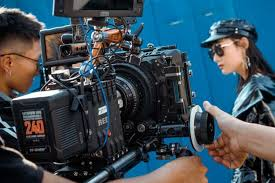

**Correlation** summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association. **(Excerpted from geeksforgeeks)**

###### CHANGING DIRECTORY 

In [249]:
import os
os.chdir(r'C:\Users\Owner\Desktop\JAMES_OLUBOBADE_PROJECT_PORTFOLIO')
os.getcwd()

'C:\\Users\\Owner\\Desktop\\JAMES_OLUBOBADE_PROJECT_PORTFOLIO'

###### IMPORT LIBRARIES 

In [250]:
import warnings
warnings.filterwarnings('ignore')

#Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

# Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

###### LOADING DATA WITH CSV FORMAT

In [251]:
# loading csv data to dataframe 
df = pd.read_csv('MOVIE_INDUSTRY.csv')

In [252]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

###### UNDERSTANDING THE DATASET

In [253]:
# Shape of data
print('There is', df.shape[0], 'observation and', df.shape[1], 'column in the dataset')

There is 7668 observation and 15 column in the dataset


In [254]:
#shape of data
df.shape

(7668, 15)

In [255]:
#Checking the head of the dataset
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [256]:
#Checking the tail of the dataset
df.tail()

name rating   genre  year                          released  \
7663   More to Life    NaN   Drama  2020  October 23, 2020 (United States)   
7664    Dream Round    NaN  Comedy  2020  February 7, 2020 (United States)   
7665  Saving Mbango    NaN   Drama  2020         April 27, 2020 (Cameroon)   
7666   It's Just Us    NaN   Drama  2020   October 1, 2020 (United States)   
7667      Tee em el    NaN  Horror  2020   August 19, 2020 (United States)   

      score  votes       director         writer              star  \
7663    3.1   18.0  Joseph Ebanks  Joseph Ebanks      Shannon Bond   
7664    4.7   36.0   Dusty Dukatz    Lisa Huston  Michael Saquella   
7665    5.7   29.0   Nkanya Nkwai   Lynno Lovert      Onyama Laura   
7666    NaN    NaN  James Randall  James Randall     Christina Roz   
7667    5.7    7.0   Pereko Mosia   Pereko Mosia  Siyabonga Mabaso   

            country   budget  gross                    company  runtime  
7663  United States   7000.0    NaN                        NaN     90.0  
7664  United States      NaN    NaN  Cactus Blue Entertainment     90.0  
7665  United States  58750.0    NaN           Embi Productions      NaN  
7666  United States  15000.0    NaN                        NaN    120.0  
7667   South Africa      NaN    NaN                PK 65 Films    102.0

In [257]:
#checking  number of obs and columns ,index of columns, 
#name of columns, number of non_null values and datatype,
#(memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [258]:
#Getting data type of varibles
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [259]:
# Checking the unique values
df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

In [260]:
# checking for duplicate values
df_nodub=df.drop_duplicates()

print(df.shape,df_nodub.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodub.shape[0])

(7668, 15) (7668, 15) 
 Number of duplicate data :  0


**NOTE:** There are no duplicate values in this dataset

In [261]:
# Checking for missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

**NOTE:** There are missing values, which will be handled below

In [262]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [263]:
percentage_of_miss()

Number of Missing  Percentage
budget                 2171   28.312467
gross                   189    2.464789
rating                   77    1.004173
company                  17    0.221701
runtime                   4    0.052165
score                     3    0.039124
votes                     3    0.039124
writer                    3    0.039124
country                   3    0.039124
released                  2    0.026082
star                      1    0.013041

In [264]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### HANDLING CATEGORICAL AND NUMERICAL MISSING VALUES

###### CATEGORICAL: Impute / Replace Missing Values with Mode

In [265]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['released'] = df['released'].fillna(df['released'].mode()[0])
df['writer'] = df['writer'].fillna(df['writer'].mode()[0])
df['star'] = df['star'].fillna(df['star'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['company'] = df['company'].fillna(df['company'].mode()[0])

# Income columns are typically better to fill in as mode
df['budget'] = df['budget'].fillna(df['budget'].mode()[0])
df['gross'] = df['gross'].fillna(df['gross'].mode()[0])

###### NUMERICAL: Impute / Replace Missing Values with Median

**NOTE:** There is a float column in which exists some empty values written as 0.00/NaN.
I filled these 0 values using fillna(method='ffill')

In [266]:
df['score'] = df['score'].replace(0, np.nan).fillna(method='ffill').fillna(0)
df['votes'] = df['votes'].replace(0, np.nan).fillna(method='ffill').fillna(0)
df['runtime'] = df['runtime'].replace(0, np.nan).fillna(method='ffill').fillna(0)

In [267]:
# Checking if there are any missing values after handling them
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [268]:
# CHANGE DATA TYPES IN SOME COLUMNS
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [269]:
# Drop irrelevant column
#In this data set I don't have any nead for released as they are the same as year 
df.drop(labels=['released'], axis=1, inplace=True)#inplace=True to update df

In [270]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  
0  United Kingdom  19000000   46998772        Warner Bros.      146  
1   United States   4500000   58853106   Columbia Pictures      104  
2   United States  18000000  538375067           Lucasfilm      124  
3   United States   3500000   83453539  Paramount Pictures       88  
4   United States   6000000   39846344      Orion Pictures       98

In [271]:
# SORTING BY GROSS REVENUE
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

**NOTE:** After sorting by **gross** earnings based on the data **Avatar** is the most grossing movie as of now with $2,847,246,203.
    

    


In [272]:
pd.set_option('display.max_rows', None)

In [273]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [274]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  
0  United Kingdom  19000000   46998772        Warner Bros.      146  
1   United States   4500000   58853106   Columbia Pictures      104  
2   United States  18000000  538375067           Lucasfilm      124  
3   United States   3500000   83453539  Paramount Pictures       88  
4   United States   6000000   39846344      Orion Pictures       98

### FINDING CORRELATIONS IN THE DATASET

###### HYPOTHESIS

In [275]:
# Budget may have high correlation?
# Company may have high correlation?

###### LETS CHECK SCATTER PLOT WITH BUDGET VS GROSS

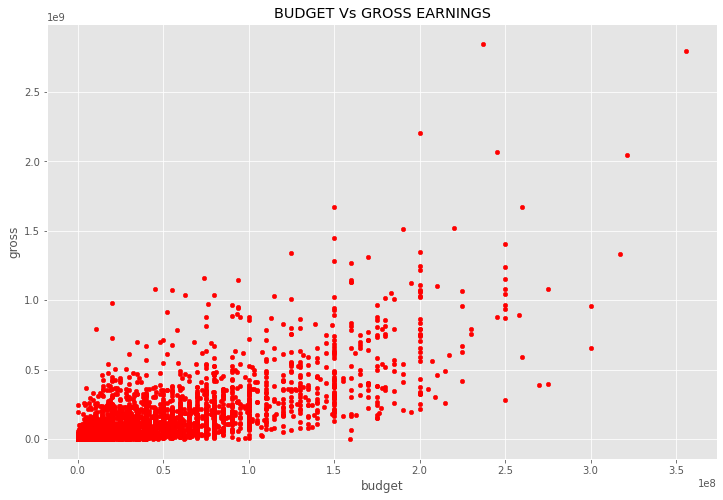

In [276]:
df.plot(kind='scatter',x='budget',y='gross',color='red')

plt.title('BUDGET Vs GROSS EARNINGS')

plt.show()

Text(0.5, 1.0, 'BUDGET Vs GROSS EARNINGS')

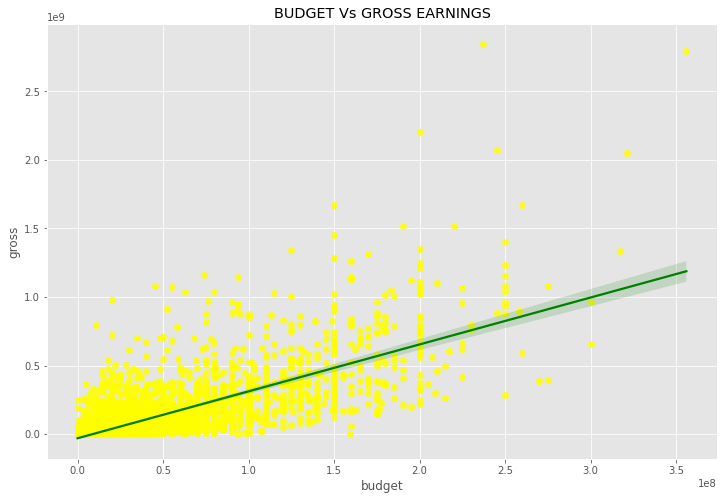

In [277]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "yellow"}, line_kws={"color": "green"})

plt.title('BUDGET Vs GROSS EARNINGS')

In [278]:
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  
0  United Kingdom  19000000   46998772        Warner Bros.      146  
1   United States   4500000   58853106   Columbia Pictures      104  
2   United States  18000000  538375067           Lucasfilm      124  
3   United States   3500000   83453539  Paramount Pictures       88  
4   United States   6000000   39846344      Orion Pictures       98

In [279]:
# Let's Start looking at correlation
# Types of correlation: pearson, kendall, spearman

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.098098  0.222427  0.292360  0.260251  0.120694
score    0.098098  1.000000  0.409064  0.061759  0.185777  0.399116
votes    0.222427  0.409064  1.000000  0.462033  0.632379  0.309140
budget   0.292360  0.061759  0.462033  1.000000  0.746670  0.273503
gross    0.260251  0.185777  0.632379  0.746670  1.000000  0.244601
runtime  0.120694  0.399116  0.309140  0.273503  0.244601  1.000000

In [280]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067724  0.330410  0.192458  0.199261  0.097144
score    0.067724  1.000000  0.299756 -0.003955  0.085112  0.283102
votes    0.330410  0.299756  1.000000  0.283361  0.535500  0.198226
budget   0.192458 -0.003955  0.283361  1.000000  0.392712  0.196855
gross    0.199261  0.085112  0.535500  0.392712  1.000000  0.167204
runtime  0.097144  0.283102  0.198226  0.196855  0.167204  1.000000

In [281]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099149  0.468107  0.266817  0.291816  0.142911
score    0.099149  1.000000  0.427638 -0.006014  0.124661  0.399181
votes    0.468107  0.427638  1.000000  0.398490  0.728961  0.290103
budget   0.266817 -0.006014  0.398490  1.000000  0.538178  0.275417
gross    0.291816  0.124661  0.728961  0.538178  1.000000  0.244114
runtime  0.142911  0.399181  0.290103  0.275417  0.244114  1.000000

**NOTE:** High correlation between budget and gross from the above methods.

In [282]:
# Gross Description

df['gross'].describe()

count    7.668000e+03
mean     7.691074e+07
std      1.639750e+08
min      3.090000e+02
25%      4.681151e+06
50%      1.895543e+07
75%      7.262022e+07
max      2.847246e+09
Name: gross, dtype: float64

<AxesSubplot:ylabel='Frequency'>

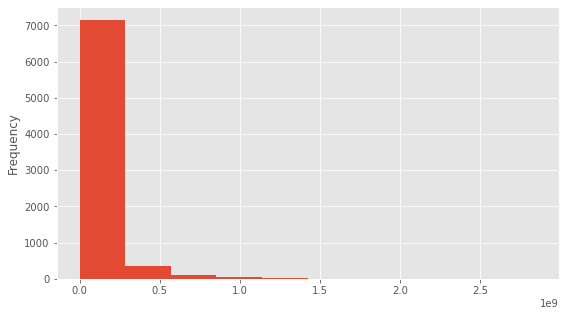

In [283]:
# Histogram of gross

plt.figure(figsize = (9, 5))
df['gross'].plot(kind ="hist")


In [284]:
# Gross Description

df['budget'].describe()

count    7.668000e+03
mean     3.117600e+07
std      3.579625e+07
min      3.000000e+03
25%      1.400000e+07
50%      2.000000e+07
75%      3.200000e+07
max      3.560000e+08
Name: budget, dtype: float64

<AxesSubplot:ylabel='Frequency'>

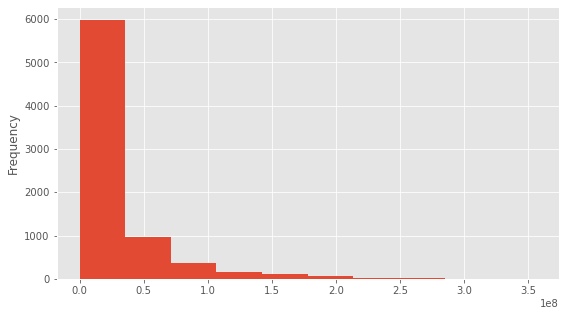

In [285]:
# Histogram of gross

plt.figure(figsize = (9, 5))
df['budget'].plot(kind ="hist")


###### CORRELATION MATRIX

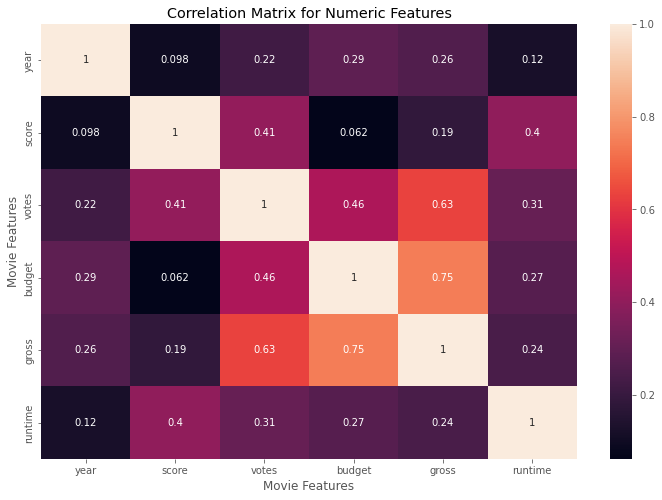

In [286]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [287]:
# looking at company
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  
0  United Kingdom  19000000   46998772        Warner Bros.      146  
1   United States   4500000   58853106   Columbia Pictures      104  
2   United States  18000000  538375067           Lucasfilm      124  
3   United States   3500000   83453539  Paramount Pictures       88  
4   United States   6000000   39846344      Orion Pictures       98

**NOTE:** Company is a categorical feature but I will convert it and all other categorical feature to numerical as can see by the below codes

In [288]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized [col_name] = df_numerized[col_name].astype('category')
        df_numerized [col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()
        

name  rating  genre  year  score    votes  director  writer  star  country  \
0  6587       6      6  1980    8.4   927000      2589    4014  1047       54   
1  5573       6      1  1980    5.8    65000      2269    1632   327       55   
2  5142       4      0  1980    8.7  1200000      1111    2567  1745       55   
3   286       4      4  1980    7.7   221000      1301    2000  2246       55   
4  1027       6      4  1980    7.3   108000      1054     521   410       55   

     budget      gross  company  runtime  
0  19000000   46998772     2319      146  
1   4500000   58853106      731      104  
2  18000000  538375067     1540      124  
3   3500000   83453539     1812       88  
4   6000000   39846344     1777       98

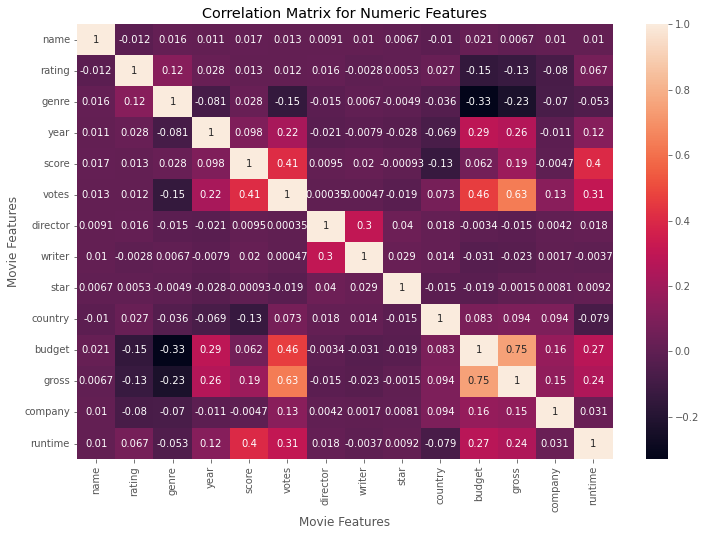

In [289]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [290]:
df_numerized.corr()

name    rating     genre      year     score     votes  \
name      1.000000 -0.012441  0.016355  0.011453  0.017237  0.013038   
rating   -0.012441  1.000000  0.123465  0.027931  0.013312  0.012231   
genre     0.016355  0.123465  1.000000 -0.081261  0.027832 -0.145296   
year      0.011453  0.027931 -0.081261  1.000000  0.098098  0.222427   
score     0.017237  0.013312  0.027832  0.098098  1.000000  0.409064   
votes     0.013038  0.012231 -0.145296  0.222427  0.409064  1.000000   
director  0.009079  0.016255 -0.015258 -0.020795  0.009509  0.000349   
writer    0.010018 -0.002795  0.006746 -0.007901  0.019541  0.000467   
star      0.006749  0.005314 -0.004856 -0.027745 -0.000934 -0.019322   
country  -0.010425  0.026930 -0.035896 -0.069423 -0.134520  0.073485   
budget    0.020926 -0.148192 -0.328865  0.292360  0.061759  0.462033   
gross     0.006721 -0.130496 -0.233674  0.260251  0.185777  0.632379   
company   0.010369 -0.079626 -0.070013 -0.011438 -0.004663  0.130514   
runtime   0.010448  0.066610 -0.052806  0.120694  0.399116  0.309140   

          director    writer      star   country    budget     gross  \
name      0.009079  0.010018  0.006749 -0.010425  0.020926  0.006721   
rating    0.016255 -0.002795  0.005314  0.026930 -0.148192 -0.130496   
genre    -0.015258  0.006746 -0.004856 -0.035896 -0.328865 -0.233674   
year     -0.020795 -0.007901 -0.027745 -0.069423  0.292360  0.260251   
score     0.009509  0.019541 -0.000934 -0.134520  0.061759  0.185777   
votes     0.000349  0.000467 -0.019322  0.073485  0.462033  0.632379   
director  1.000000  0.299512  0.039715  0.017926 -0.003361 -0.014808   
writer    0.299512  1.000000  0.028745  0.014409 -0.030961 -0.023007   
star      0.039715  0.028745  1.000000 -0.014749 -0.018863 -0.001529   
country   0.017926  0.014409 -0.014749  1.000000  0.083169  0.094000   
budget   -0.003361 -0.030961 -0.018863  0.083169  1.000000  0.746670   
gross    -0.014808 -0.023007 -0.001529  0.094000  0.746670  1.000000   
company   0.004250  0.001665  0.008072  0.094210  0.164808  0.153545   
runtime   0.017537 -0.003723  0.009153 -0.079240  0.273503  0.244601   

           company   runtime  
name      0.010369  0.010448  
rating   -0.079626  0.066610  
genre    -0.070013 -0.052806  
year     -0.011438  0.120694  
score    -0.004663  0.399116  
votes     0.130514  0.309140  
director  0.004250  0.017537  
writer    0.001665 -0.003723  
star      0.008072  0.009153  
country   0.094210 -0.079240  
budget    0.164808  0.273503  
gross     0.153545  0.244601  
company   1.000000  0.031246  
runtime   0.031246  1.000000

In [291]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.012441
          genre       0.016355
          year        0.011453
          score       0.017237
          votes       0.013038
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020926
          gross       0.006721
          company     0.010369
          runtime     0.010448
rating    name       -0.012441
          rating      1.000000
          genre       0.123465
          year        0.027931
          score       0.013312
          votes       0.012231
          director    0.016255
          writer     -0.002795
          star        0.005314
          country     0.026930
          budget     -0.148192
          gross      -0.130496
          company    -0.079626
          runtime     0.066610
genre     name        0.016355
          rating      0.123465
          genre       1.000000
          year       -0.081261
        

In [292]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.328865
genre     budget     -0.328865
          gross      -0.233674
gross     genre      -0.233674
budget    rating     -0.148192
rating    budget     -0.148192
genre     votes      -0.145296
votes     genre      -0.145296
score     country    -0.134520
country   score      -0.134520
gross     rating     -0.130496
rating    gross      -0.130496
year      genre      -0.081261
genre     year       -0.081261
company   rating     -0.079626
rating    company    -0.079626
country   runtime    -0.079240
runtime   country    -0.079240
company   genre      -0.070013
genre     company    -0.070013
year      country    -0.069423
country   year       -0.069423
genre     runtime    -0.052806
runtime   genre      -0.052806
country   genre      -0.035896
genre     country    -0.035896
budget    writer     -0.030961
writer    budget     -0.030961
star      year       -0.027745
year      star       -0.027745
writer    gross      -0.023007
gross     writer     -0.023007
director

In [293]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.632379
votes     gross       0.632379
gross     budget      0.746670
budget    gross       0.746670
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

### CONCLUSION 

1. **Votes** and Budget have the highest correlation to **gross** earnings. 

2. **Company** has low correlation to **gross** earnings.

